In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


In [2]:
import seaborn as sns
import torch

# ডেটাসেট লোড
iris = sns.load_dataset('iris')

# ইনপুট ফিচারগুলোকে টেনসরে রূপান্তর
data = torch.tensor(iris[iris.columns[0:4]].values).float()  # 🔸 .float() ব্যবহার করো dtype মিলাতে

# লেবেল ইনিশিয়ালাইজ
labels = torch.zeros(len(data), dtype=torch.long)

# 🔸 spelling mistake ফিক্স করা হয়েছে: 'verginica' → 'virginica'
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2


### A brief on using train_test_split

In [3]:
fakedata=np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels=np.arange(10)>4
print(fakedata),print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [6]:
train_data,test_data, train_labels,test_labels= train_test_split(fakedata, fakelabels,test_size=.2, shuffle=False)

print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

#print out the train/test data
print('Training data: ')
print(train_data)
print(' ')

print('Test data: ')
print(test_data)

Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]
 
Test data: 
[[ 91  92  93  94]
 [101 102 103 104]]


### Now back to the model 

In [8]:
import torch
import torch.nn as nn

def createANewModel():
    # 🔹 Model Architecture
    ANNiris = nn.Sequential(
        nn.Linear(4, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 3),  # 3 classes for Iris dataset
    )

    # 🔹 Loss Function (multi-class classification)
    lossfun = nn.CrossEntropyLoss()

    # 🔹 Optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

    return ANNiris, lossfun, optimizer


In [10]:
from sklearn.model_selection import train_test_split

numepochs = 200

def trainTheModel(model, lossfun, optimizer, trainProp):
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp)


    for epochi in range(numepochs):
        # 🔹 প্রতি epoch-এ train-test ভাগ করো
       
        # 🔹 Forward pass (Train data)
        yHat = model(X_train)
        loss = lossfun(yHat, y_train)
        losses[epochi] = loss.item()

        # 🔹 Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 🔹 Accuracy হিসাব (Train set)
        train_pred = torch.argmax(model(X_train), axis=1)
        train_accuracy = 100 * torch.mean((train_pred == y_train).float())
        trainAcc.append(train_accuracy.item())

        # 🔹 Accuracy হিসাব (Test set)
        test_pred = torch.argmax(model(X_test), axis=1)
        test_accuracy = 100 * torch.mean((test_pred == y_test).float())
        testAcc.append(test_accuracy.item())

    return losses, trainAcc, testAcc


### Test the models by running it once

In [13]:
# 🔹 মডেল তৈরি করো
model, lossfun, optimizer = createANewModel()

# 🔹 মডেল ট্রেন করো
losses, trainAcc, testAcc = trainTheModel(model, lossfun, optimizer, trainProp=0.8)


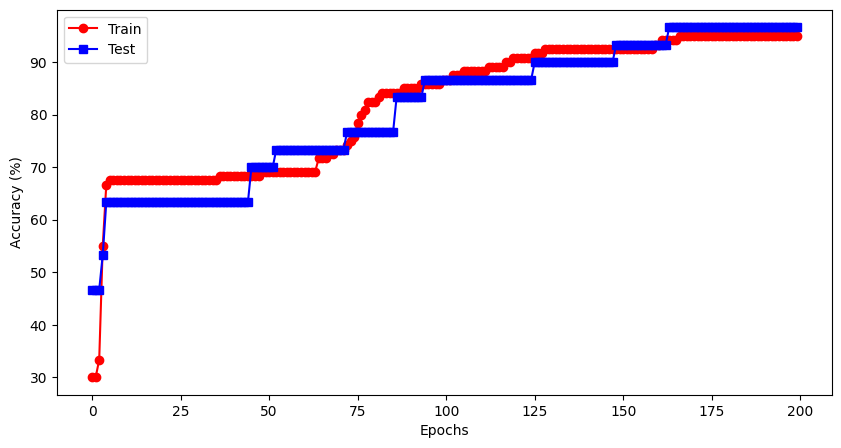

In [18]:
fig=plt.figure(figsize=(10,5))

plt.plot(trainAcc, 'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

### Now for the experiment

In [22]:
trainSetSizes = np.linspace(.2, .95, 10)
numepochs = 200

allTrainAcc = np.zeros((len(trainSetSizes), numepochs))
allTestAcc = np.zeros((len(trainSetSizes), numepochs))

for i in range(len(trainSetSizes)):
    ANNiris, lossfun, optimizer = createANewModel()
    _,trainAcc, testAcc = trainTheModel(ANNiris, lossfun, optimizer, trainSetSizes[i])

    allTrainAcc[i, :] = trainAcc
    allTestAcc[i, :] = testAcc


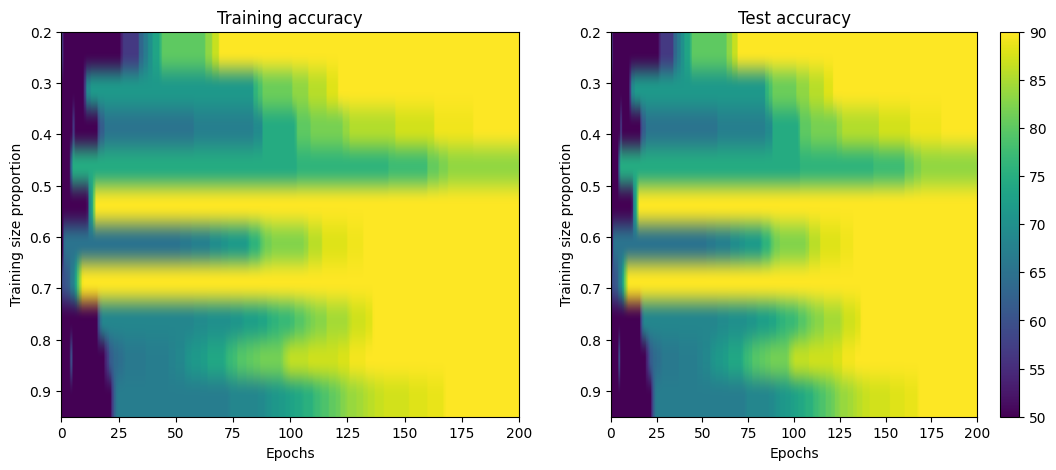

In [24]:
fig,ax=plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',vmin=50,vmax=90,extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p=ax[1].imshow(allTrainAcc,aspect='auto',vmin=50,vmax=90,extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()